# Homework 3: Didn't Catch Them All
Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, May 2  

Thomas Waddleton

If there are issues with the homework, please [e-mail Prof. Tanedo](mailto:flip.tanedo@ucr.edu) before the weekend. 

Make sure you do Problem 1.B and 1.C absolutely correctly (check against the plot in 1.D to see if you are correct). The rest of the problem set are variations of this that involve lots of "copy-pasta." (And so the problem set isn't as long as it looks.)

## Problem 1: Lotka-Volterra equations

The **Lotka-Volterra** equations are a model of the population dynamics of predators and prey. See: https://en.wikipedia.org/wiki/Lotka–Volterra_equations

Let $x$ be the population of [Caterpie](http://www.pokemon.com/us/pokedex/caterpie) (prey).  
Let $y$ be the population of [Pidgeotto](http://www.pokemon.com/us/pokedex/pidgeotto) (predator).

The Lotka-Volterra equations are:  

$\displaystyle \frac{dx}{dt} = \alpha x - \beta x y$  

$\displaystyle \frac{dy}{dt} = \delta x y - \gamma y$  
 
The dimensionless parameters $\alpha$, $\beta$, $\gamma$, and $\delta$ are positive real numbers that characterize the interaction of the two species.

## 1.A What do these parameters mean?

"Read" these equations and explain, in words, what the paramters $\alpha$, $\beta$, $\gamma$, and $\delta$ mean. 


We'll do the first one together: If $\alpha$ goes up, does $\dot x$ go up or down? *When $\alpha$ goes up, $\dot x$ goes up, so that the number of prey increase.* We thus interpret $\alpha$ as a parameter that tells us about the **reproduction rate** of Caterpie. 

* Explain what the remaining parameters mean.

* If $\delta = \beta = 0$, these equations decouple and have a simple analytic solution. How do you interpret these solutions? What happens as $t\to \infty$? (How do you interpret this?)

### Parameter Description

$\beta$: In the first equation, $\beta$ can be seen as a parameter detaling what happens if the two populations interact, i.e when Pidgeottos eat Caterpie. I'm going to call it a dinner-parameter.

$\gamma$: In the Pidgeotto population, $\gamma$ represents the natural death of Pidgeottos from natural population progression. Let's call it the life's-rough-parameter.

$\delta$: This parameter details stability in Pidgeotto population from the number of Caterpie available to be eaten. This shall be known as the early-bird-gets-the-worm-parameter, or the worm-parameter for short.

If $\delta = \beta = 0$ this simplifies the two populations into a world where neither species is in contact with the other. In this situation, taking $t \to \infty$, it sucks to be a Pidgeotto as ultimately the population will all die out from malnutrition. Mathematically it's great to be a Caterpie here as population will simply grow exponentially, but realistically there's going to be way too many Caterpie and at that point even Ash might have a chance to catch one.

## 1.B Code this up!

Treat $\alpha$, $\beta$, $\delta$, and $\gamma$ as [global variables](http://stackoverflow.com/questions/484635/are-global-variables-bad). Code the Lotka-Volterra equations as:
  

$\displaystyle \frac{dx}{dt} = f(x,y,t)$  

$\displaystyle \frac{dy}{dt} = g(x,y,t)$  

In [1]:
# a quick way to fix these parameters in one line
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

def f(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return alpha*x - beta*x*y

def g(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return delta*x*y - gamma*y

In [2]:
# Test your code: you should get 0.047 and -0.09:
print( f(.1,.1,0) )
print( g(.1,.1,0) )

0.047
-0.09


## 1.C Time evolution

Fix initial conditions, $x_0$, $y_0$ at $t=0$. We would like to know what happens after a year. We won't be picky about units, but you should be comfortable that implicitly $t$ has units of time.

It helps to do the following in one cell so that you can re-run it with different values to see what happens. (By the way, you should do this. Not for any extra credit, but just to *play* with the tools you're building.)

1. [initialize a python array](http://lmgtfy.com/?q=how+to+initialize+an+array+in+numpy) with 365 elements representing the days of the year. We'll use [`arange`](https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation) from Numpy, following what we did in [Lecture 7](https://github.com/Physics177-2017/Lec07-EulerMethod/blob/master/Lecture%207%20Euler's%20Method.ipynb)

2. Use **Euler's method** to fill python arrays `xlist` and `ylist` with the Caterpie and Pigeotto populations for each day.
    * Initialize empty python arrays `xlist` and `ylist`
    * Initialize the "updating" variables `x` and `y` to their initial values `x0` and `y0`
    * In a `for` loop, `append` the `x` and `y` values into `xlist` and `ylist` and then update the `x` and `y` values using the Lotka-Volterra equations.

3. Plot the populations as a function of time 
    * Convert the arrays `t`, `x`, and `y` into Numpy arrays.
    * Use `matplotlib` to plot $x(t)$ and $y(t)$


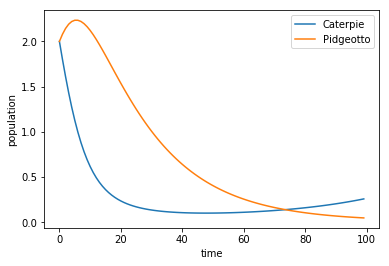

In [17]:
## PART 1

## If you want to use np.arange(...)
import numpy as np

# A reminder of our earlier parameters
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.D Discussion

Your plot should reproduce this:

<img src="HW3_plot1.png">

In your own words, tell the story of what is going on with the Caterpie and Pidgeotto populations over the time period shown. What do you expect will happen as these populations continue to dynamically evolve?

### The Tale of Caterpie vs. Pidgeotto

It was a time of great confusion, if time" is even the proper word. Two populations suddenly appeared in a forest completely devoid of normal forest attributes: a lone light source shone constant as the need for a day/night cycle was unneeded (at least until Gen II), there were no background noises, as only the two types of creatures existed (2 of each kind), and the air was pure without any outside factors floating around.

The two species: one green worm-like one called Caterpie, the other a majestic bird Pidgeotto, were natural enemies in a sense. The large Pidgeotto mercilessly would hunt down the defenseless Caterpie, with the Caterpie running to hide (but not very effectively as their fates were determined by four greek letters, if only a fifth running-parameter $\rho$ could have saved them). As the birds hunted, the Caterpie population dwindled and the Pidgeotto population soared (by a whole ~0.15) but it was all for naught. With little Caterpie remaining, the Pidgeotto population could only fall rapidly with no replenishing source of food. Alas, the experiment was doomed to fail from initialization. Small sample size...
    
With a time evolution added in, we would begin to see some form of oscillatory behavior arise as populations grew then decreased opposite the other.

## 1.E What happens in the future?

Copy the code from Problem 1.C and paste it in a new cell below. Re-run it for $N=500$.

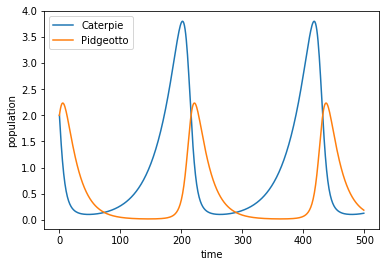

In [4]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.F Other parameters

Copy the code from Problem 1.C and plot the following scenario:  
`alpha, beta, delta, gamma = 4, 2, 3.0, 3.0`  
`N = 100`

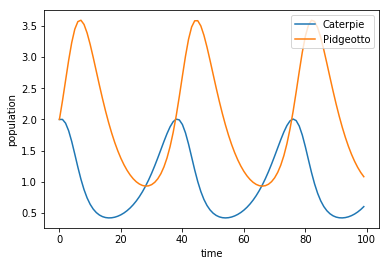

In [5]:
alpha, beta, delta, gamma = 4, 2, 3.0, 3.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

## 1.G When things break down

Copy the code from Problem 1.C and plot the following scenario:  
`dt = 0.5`  

The resulting plot will not look like your result from Problem 1.C. For `dt = 0.75` things get really strange. Things will get worse as `dt` becomes larger. Say a few words about what's going on. 

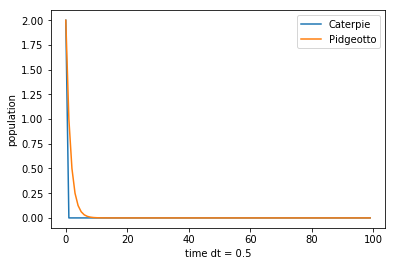

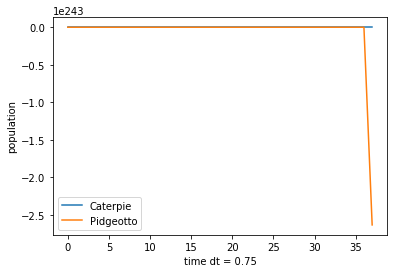

In [8]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.5  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time dt = 0.5')
plt.ylabel('population')
plt.legend()
plt.show()


x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.75  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time2 = np.arange(N) 



## PART 2

xlist2 = []
ylist2 = []

# Initialize x and y
x = x0
y = y0

for t in time2:
    xlist2.append(x)
    x += dt*f(x,y,t)
    ylist2.append(y)
    y += dt*g(x,y,t)



## PART 3

tt2 = np.array(time2)
xx2 = np.array(xlist2)
yy2 = np.array(ylist2)

import matplotlib.pyplot as plt2


plt2.plot(tt2,xx2,label='Caterpie')
plt2.plot(tt2,yy2,label='Pidgeotto')
plt2.xlabel('time dt = 0.75')
plt2.ylabel('population')
plt2.legend()
plt2.show()


With large values of $dt$, the graphs are becoming more and more inaccurate. It seems to result in skipping over important aspects of the original functions that would produce the oscillations witnessed in other problems. Instead of a dependency, the populations seem to die instantly.

## Problem 2: Plotting Practice


### 2.A Plotting on the Caterpie--Pidgeotto plane

Copy the code from Problem 1.E (with `N=500`) and modify it so that it plots the Caterpie and Pidgeotto populations on the horizontal and vertical axes, respectively.

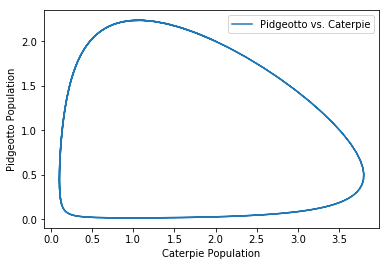

In [10]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f(x,y,t)
    ylist.append(y)
    y += dt*g(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(xx,yy, label='Pidgeotto vs. Caterpie')
plt.xlabel('Caterpie Population')
plt.ylabel('Pidgeotto Population')
plt.legend()
plt.show()
## Your modifications will be at the bottom of the cell

### 2.B Plotting the velocity in population space

**Quiver plots** are what `matplotlib` calls plots of vector fields. The data required to plot a vector field are: the $x$ and $y$ positions of the base of the vector ("bottom part" of the arrow) and the $x$ and $y$ components of the vector itself. In the example below, we call the latter two numbers $u$ and $v$.

In order to understand how we set these up, you may want to brush up on what `meshgrid` does. Here are a couple of references:  
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html (check out the examples)
* http://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python (this is a very good discussion)

The documentation on quiver plots is sparse. Here are a few links:
* A simple example: http://www.scipy-lectures.org/intro/matplotlib/auto_examples/plot_quiver_ex.html
* http://stackoverflow.com/questions/34375345/how-does-pythons-matplotlib-pyplot-quiver-exactly-work
* I have not used `plot.ly` to make plots, but you are welcome to use it instead if it's easier. (Note: if you do this, you're on your own!) https://plot.ly/matplotlib/quiver-plots/
* The `matplotlib` "advanced quiver plots" examples are perhaps a little too advanced for beginners: https://matplotlib.org/2.0.0/examples/pylab_examples/quiver_demo.html



Here's an example of how they work:

side=
[ 0.  1.  2.  3.  4.]
x=
[[ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]
 [ 0.  1.  2.  3.  4.]]
u=
[[ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]
 [ 0.  2.  4.  6.  8.]]


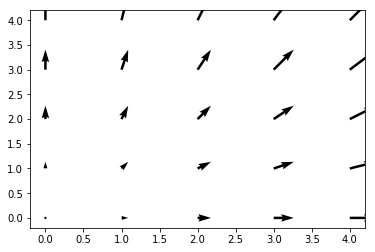

In [22]:
## EXAMPLE OF HOW QUIVER PLOTS WORK

import numpy as np
import matplotlib.pyplot as plt

side = np.linspace(0,4,5)

# base positions of the vectors
x,y = np.meshgrid(side,side)

# x and y components of the vectors at a given point
u,v = np.meshgrid(2*side,2*side)

print("side=") 
print(side)

print("x=") 
print(x)

print("u=") 
print(u)

plt.quiver(x, y, u, v, scale=100)
plt.show()

In this problem, complete the code below to produce a quiver plot for the Lotka-Volterra system of equations above. You will also overlay the result from Problem 2.A to show that that is an **integral curve** for the system of differential equations.

In other words, the plot from 2.A is a curve such that the "quiver" at each point on the curve is exactly tangent to the curve. Further, the magnitude of the "quiver" is the speed at which the two populations are changing along the curve.

**Extra Credit**: also make a plot using `streamplot`: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.streamplot

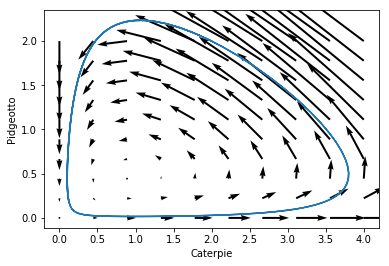

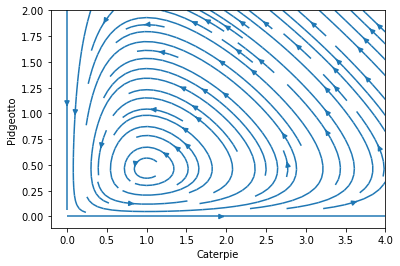

In [13]:
ff = np.vectorize(f)
gg = np.vectorize(g)

side = np.linspace(0,4,10)
XX,YY = np.meshgrid(side,side/2)
UU = ff(XX,YY,0)
VV = gg(XX,YY,0)

plt.quiver(XX,YY,UU,VV,scale=20)
plt.plot(xx,yy)
plt.xlabel('Caterpie')
plt.ylabel('Pidgeotto')
plt.show()

import matplotlib.pyplot as plt3

plt3.streamplot(XX, YY, UU, VV, density=1)
plt3.xlabel('Caterpie')
plt3.ylabel('Pidgeotto')
plt3.show()

## Problem 3: External effects

The $f(x,y,t)$ and $g(x,y,t)$ used for problems 1 and 2 had no explicit time dependence. The Caterpie and Pidgeotto population dynamics were completely determined by the current populations. It is not hard to imagine, however, that there may be external time-dependent effects. Perhaps Pigeottos hunt more effectively at night, or perhaps Caterpies have a daily cycle of being outside where they can be hunted by Pigeottos.

We'll model some time dependence by tweaking the $f$ and $g$ expressions:

$\displaystyle \frac{dx}{dt} = \alpha x - \beta \left( 1 - A_\beta \sin(t) \right) x y + x \sin(t/4)$  

$\displaystyle \frac{dy}{dt} = \delta \left( 1 - A_\delta \sin(t) \right) x y - \gamma y + y \sin(t/4)$  

Use $A_\beta = A_\delta = 0.7$.

Code these into functions `f_new` and `g_new`

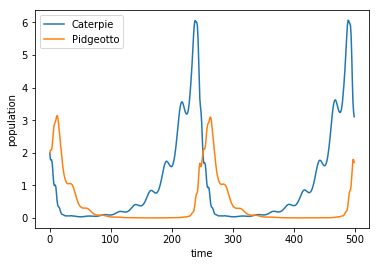

In [15]:
from math import sin as sin
from math import cos as cos

def f_new(x,y,t):
    '''
    This is the rate of change of Caterpie as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return alpha*x - beta*(1 - Ab*sin(t))*x*y + x*sin(t/4)

def g_new(x,y,t):
    '''
    This is the rate of change of Pigeotto as a function 
    of the current number of Caterpie (x), the current number
    of Pigeotto (y), and the current time (t).
    '''
    return delta*(1 - Ad*sin(t))*x*y - gamma*y + y*sin(t/4)

alpha, beta, delta, gamma, Ab, Ad = .6, 1.3, 1.0, 1.0, 0.7, 0.7

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f_new(x,y,t)
    ylist.append(y)
    y += dt*g_new(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()
## Make sure to change f and g to f_new and g_new

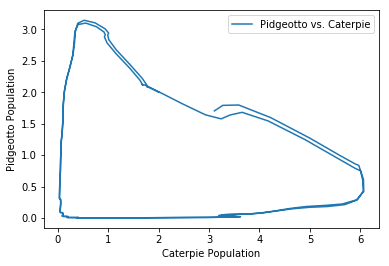

In [16]:
alpha, beta, delta, gamma, Ab, Ad = .6, 1.3, 1.0, 1.0, 0.7, 0.7

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 500    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0

for t in time:
    xlist.append(x)
    x += dt*f_new(x,y,t)
    ylist.append(y)
    y += dt*g_new(x,y,t)



## PART 3

tt = np.array(time)
xx = np.array(xlist)
yy = np.array(ylist)

import matplotlib.pyplot as plt


plt.plot(xx,yy, label='Pidgeotto vs. Caterpie')
plt.xlabel('Caterpie Population')
plt.ylabel('Pidgeotto Population')
plt.legend()
plt.show()
## Make sure to change f and g to f_new and g_new

## Problem 4: Copy-Pasta 1.C, one more time

Copy and paste your previous solution to Problem 1.C. Modify the code so that instead of Euler's Method, you are filling `xlist` and `ylist` using the **Runge-Kutta** algorithm. Show that you get the same answer. 

**Optional**: I encourage you to play with the Euler Method in 1.C and the Runge-Kutta method here to see what happens as you increase the number of steps. (Coarse graining a little may help resolve the difference between the two methods.)

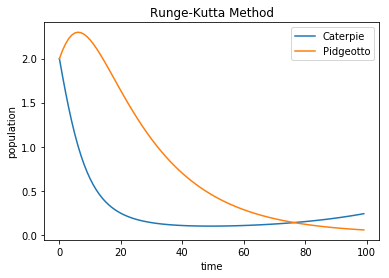

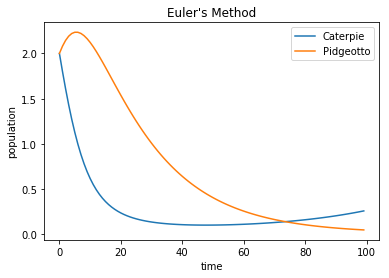

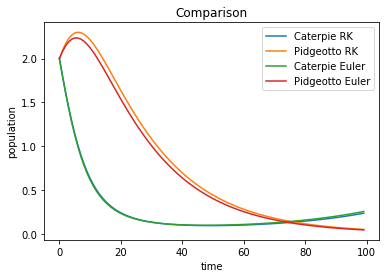

In [19]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time_rk = np.arange(N) 



## PART 2

xlist_rk = []
ylist_rk = []

# Initialize x and y
x = x0
y = y0

for t in time:
    kx1 = dt*f(x,y,t)
    ky1 = dt*g(x,y,t)
    kx2 = dt*f(x + 0.5*kx1, y + 0.5*ky1, t + 0.5*dt)
    ky2 = dt*g(x + 0.5*kx1, y + 0.5*ky1, t + 0.5*dt)
    
    xlist_rk.append(x)
    x += kx2
    ylist_rk.append(y)
    y += ky2



## PART 3

tt_rk = np.array(time_rk)
xx_rk = np.array(xlist_rk)
yy_rk = np.array(ylist_rk)

import matplotlib.pyplot as plt4


plt4.plot(tt_rk,xx_rk,label='Caterpie')
plt4.plot(tt_rk,yy_rk,label='Pidgeotto')
plt4.title("Runge-Kutta Method")
plt4.xlabel('time')
plt4.ylabel('population')
plt4.legend()
plt4.show()

plt.plot(tt,xx,label='Caterpie')
plt.plot(tt,yy,label='Pidgeotto')
plt.title("Euler's Method")
plt.xlabel('time')
plt.ylabel('population')
plt.legend()
plt.show()

import matplotlib.pyplot as plt5

plt5.plot(tt_rk,xx_rk,label='Caterpie RK')
plt5.plot(tt_rk,yy_rk,label='Pidgeotto RK')
plt5.plot(tt,xx,label='Caterpie Euler')
plt5.plot(tt,yy,label='Pidgeotto Euler')
plt5.title("Comparison")
plt5.xlabel('time')
plt5.ylabel('population')
plt5.legend()
plt5.show()

## Extra Credit: Animate

Follow the tutorial linked in the [extra credit problem of Homework 2](https://github.com/Physics177-2017/Homework02/blob/master/Homework_02.ipynb) to animate some of these plots. It may be useful to code the process in Problem 1.C as a function that takes in various parameters and outputs Numpy lists for $x$ and $y$.

Things you may want to animate:
* Animate the plot in Problem 1.C so the plot is "moving" with its time evolution (similar to giving a time-dependent phase shift to a sine wave)
* Plot a dot on the Caterpie--Pigeotto population plane and animate its movement with the evolution of time (this is an animated version of Problem 2.A)

You may (or may not) find the following references helpful:
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
http://stackoverflow.com/questions/11611705/animated-graphs-in-ipython-notebook


In [20]:
alpha, beta, delta, gamma = .6, 1.3, 1.0, 1.0

x0 = 2     # init Caterpie population
y0 = 2     # init Pidgeotto population
dt = 0.05  # time step
N = 100    # number of steps

## A python array: [0,1,2, ..., N]
time = np.arange(N) 



## PART 2

xlist = []
ylist = []

# Initialize x and y
x = x0
y = y0
def animation_attempt(x,y,t):
    for t in time:
        xlist.append(x)
        x += dt*f(x,y,t)
        ylist.append(y)
        y += dt*g(x,y,t)
    tt = np.array(time)
    xx = np.array(xlist)
    yy = np.array(ylist)
    return xx,yy


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 100))
ax.set_ylim((0, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = animation_attempt(x,y,t)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!

I still don't know what to do about this MovieWriter thing. .-.